# Predicting Coupon Acceptance on E-commerce Platforms.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

%matplotlib inline
sns.set()

np.random.seed(2345)

import warnings
warnings.filterwarnings('ignore')

#plt.style.use('dark_background')
plt.style.use('seaborn-pastel')
#sns.set_palette('Dark2')

plt.rcParams['figure.figsize'] = [5, 5]


In [2]:
df = pd.read_csv('Data.csv')
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [3]:
df.shape

(12684, 25)

In [4]:
# Delete Unsignificant Variables
df.drop(['car','temperature','education'], axis = 1, inplace = True)
print(df.shape)

(12684, 22)


In [5]:
# rename variable "Accept(Y/N?)""
df.rename(columns ={'Accept(Y/N?)':'Accept'}, inplace =True)

In [6]:
# Duplicate Values
print(df.duplicated().sum())
df.drop_duplicates(inplace = True, ignore_index = True)
print(df.duplicated().sum())

390
0


In [7]:
# null value
print(f'Null Values Count:\n{df.isna().sum()}')
print(f'{"*"*50}\nNull values in Precentage:\n{round((df.isna().sum()/len(df)*100),2)}')

Null Values Count:
destination               0
passanger                 0
weather                   0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
occupation                0
income                    0
Bar                     104
CoffeeHouse             213
CarryAway               145
RestaurantLessThan20    126
Restaurant20To50        186
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Accept                    0
dtype: int64
**************************************************
Null values in Precentage:
destination             0.00
passanger               0.00
weather                 0.00
coupon                  0.00
expiration              0.00
gender                  0.00
age                     0.00
maritalStatus           0.00
has_children            0.00
occupation   

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12294 non-null  object
 1   passanger             12294 non-null  object
 2   weather               12294 non-null  object
 3   coupon                12294 non-null  object
 4   expiration            12294 non-null  object
 5   gender                12294 non-null  object
 6   age                   12294 non-null  object
 7   maritalStatus         12294 non-null  object
 8   has_children          12294 non-null  int64 
 9   occupation            12294 non-null  object
 10  income                12294 non-null  object
 11  Bar                   12190 non-null  object
 12  CoffeeHouse           12081 non-null  object
 13  CarryAway             12149 non-null  object
 14  RestaurantLessThan20  12168 non-null  object
 15  Restaurant20To50      12108 non-null

<br>

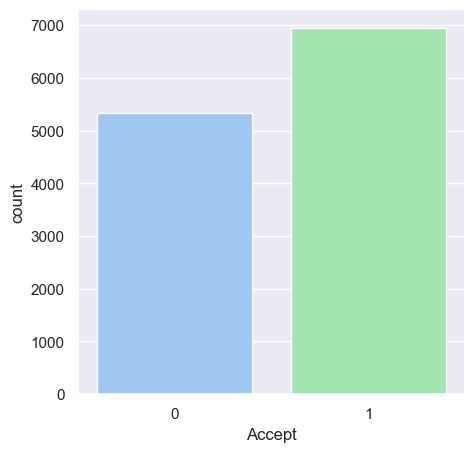

In [9]:
# distplot
sns.countplot(df['Accept'])
plt.show()

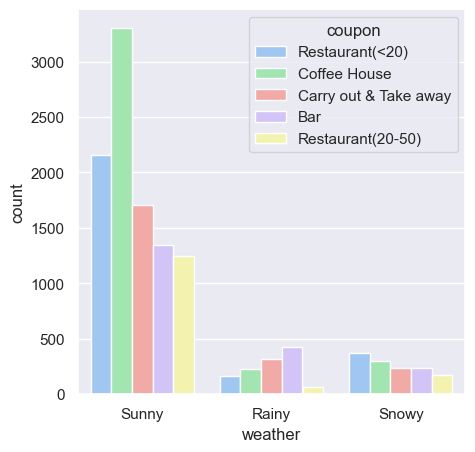

In [10]:
#plt.bar('weather','coupon',data = df)
sns.countplot(x = 'weather', hue = 'coupon', data =df )
plt.show()

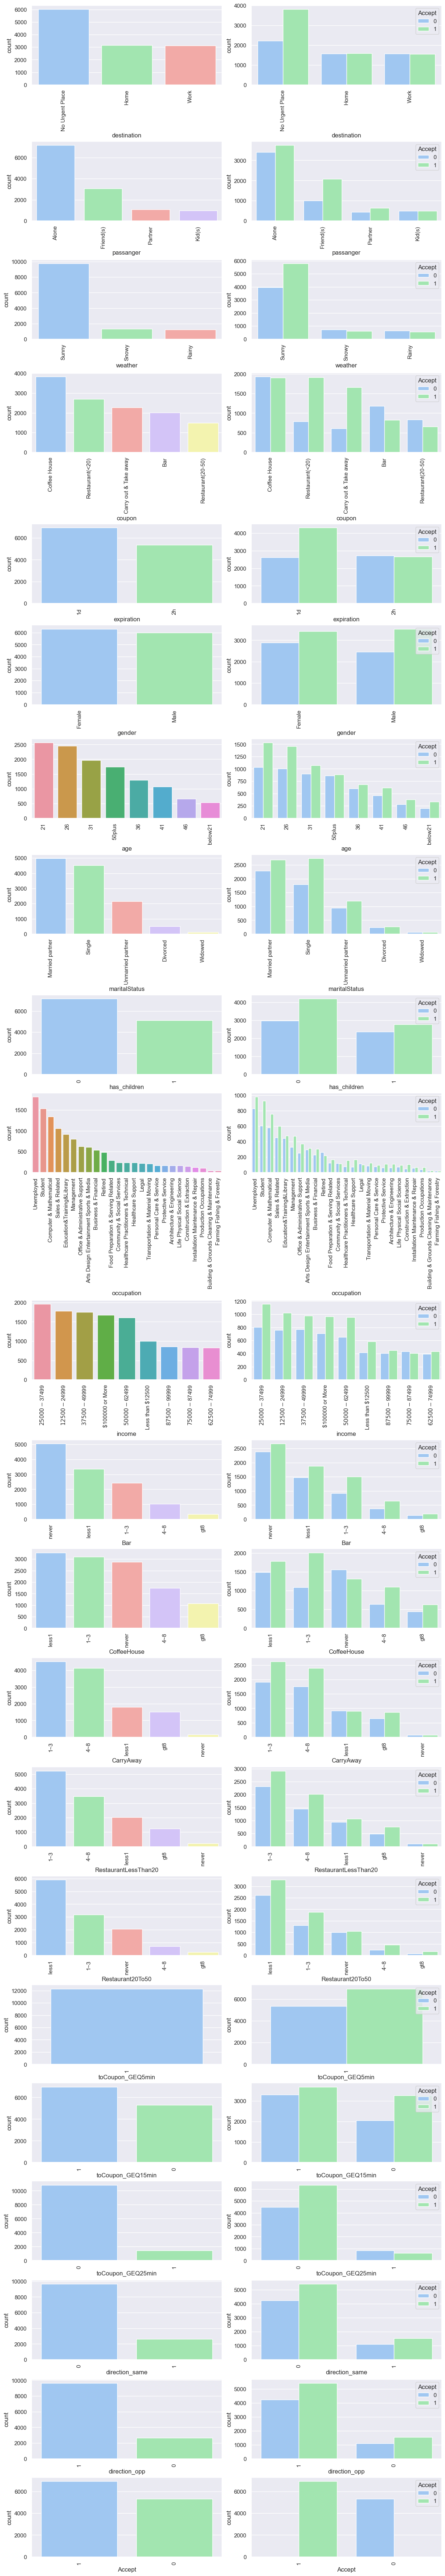

In [11]:
# Dependent vs independent variables.

a=1
plt.figure(figsize = (12,70),constrained_layout = True )
for col in (df.columns):
    
    plt.subplot(22,2,a)
    sns.countplot(x = col,  data =df, order = df[col].value_counts().index)
    plt.xticks(rotation = 90)
    a+=1

    plt.subplot(22,2,a)
    sns.countplot(x = col, hue= 'Accept', data =df, order = df[col].value_counts().index )
    plt.xticks(rotation = 90)
    a+=1
    
    
#plt.subplots_adjust(bottom=0.1, right=0.8, top=1)

plt.tight_layout()
plt.show()


In [12]:
df_Yes = df[df['Accept'] == 1]
df_No = df[df['Accept'] == 0]

In [13]:
# # age, marital_status, has_children, occupation,
# #income - how many they visit, not on which coupon they accept.
# #plt.figure(figsize = (12,5),constrained_layout = True )
# sns.countplot(x = 'toCoupon_GEQ5min',  hue = 'Accept', data =df, order = df['toCoupon_GEQ5min'].value_counts().index)
# #plt.xticks(rotation = 90)
# #plt.legend(loc='upper right', fontsize=5)
# plt.tight_layout()
# plt.show()

In [14]:
df.columns

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'has_children', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept'],
      dtype='object')

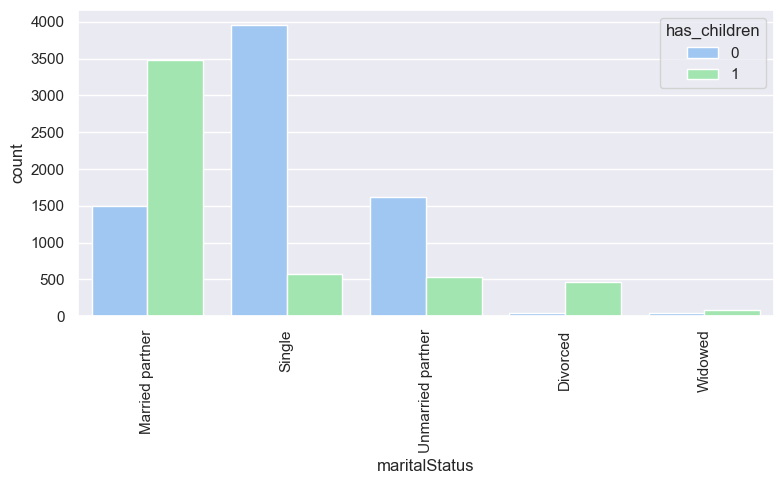

In [15]:
# has_children 1-Yes, 0-No
plt.figure(figsize = (8,5),constrained_layout = True )
   
sns.countplot(x = 'maritalStatus',  hue = 'has_children', data =df, order = df['maritalStatus'].value_counts().index)
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()


### INSIGHTS
1. Data count for coupon "Coffee House" is high and also acceptance rate is high.
2. Acceptance rate for "Carry out take away" coupon is less. "bar" has high acceptance.
3. Count for male and female is approx.same for receving and accepting coupons.
4. Data count for "Sunny" weather is high and also coupon acceptance rate is high.
5. Data count "single" and "Married Partner" is high and acceptance rate is high in all the categories. Compare to all categories Single are have less acceptance rate.
6. Rate is high for 2h expiration.
7. Rate is high when alone and with kids. less with friends.
8. Uses of coupon "toCoupon_GEQ25min" is more compare other.
9. Uses of coupon in same direction is more

<br>

In [16]:
for i in df.columns:
    print(f'{i}:{df[i].nunique()}')    

destination:3
passanger:4
weather:3
coupon:5
expiration:2
gender:2
age:8
maritalStatus:5
has_children:2
occupation:25
income:9
Bar:5
CoffeeHouse:5
CarryAway:5
RestaurantLessThan20:5
Restaurant20To50:5
toCoupon_GEQ5min:1
toCoupon_GEQ15min:2
toCoupon_GEQ25min:2
direction_same:2
direction_opp:2
Accept:2


In [17]:
for i in df.columns:
    print(f'{i}:')
    print(f'{df[i].value_counts()}\n')

destination:
No Urgent Place    6028
Home               3153
Work               3113
Name: destination, dtype: int64

passanger:
Alone        7167
Friend(s)    3081
Partner      1065
Kid(s)        981
Name: passanger, dtype: int64

weather:
Sunny    9763
Snowy    1329
Rainy    1202
Name: weather, dtype: int64

coupon:
Coffee House             3835
Restaurant(<20)          2700
Carry out & Take away    2265
Bar                      2009
Restaurant(20-50)        1485
Name: coupon, dtype: int64

expiration:
1d    6923
2h    5371
Name: expiration, dtype: int64

gender:
Female    6307
Male      5987
Name: gender, dtype: int64

age:
21         2568
26         2458
31         1970
50plus     1748
36         1290
41         1073
46          654
below21     533
Name: age, dtype: int64

maritalStatus:
Married partner      4981
Single               4533
Unmarried partner    2150
Divorced              503
Widowed               127
Name: maritalStatus, dtype: int64

has_children:
0    7159
1    513

In [18]:
# NUll Values

df.isna().sum()

destination               0
passanger                 0
weather                   0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
occupation                0
income                    0
Bar                     104
CoffeeHouse             213
CarryAway               145
RestaurantLessThan20    126
Restaurant20To50        186
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Accept                    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12294 non-null  object
 1   passanger             12294 non-null  object
 2   weather               12294 non-null  object
 3   coupon                12294 non-null  object
 4   expiration            12294 non-null  object
 5   gender                12294 non-null  object
 6   age                   12294 non-null  object
 7   maritalStatus         12294 non-null  object
 8   has_children          12294 non-null  int64 
 9   occupation            12294 non-null  object
 10  income                12294 non-null  object
 11  Bar                   12190 non-null  object
 12  CoffeeHouse           12081 non-null  object
 13  CarryAway             12149 non-null  object
 14  RestaurantLessThan20  12168 non-null  object
 15  Restaurant20To50      12108 non-null

In [20]:
df['Restaurant20To50'].mode()[0]

'less1'

In [21]:
df['Bar'].fillna(df['Bar'].mode()[0], inplace =True)

In [22]:
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace =True)

In [23]:
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace =True)

In [24]:
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace =True)

In [25]:
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace =True)

In [26]:
# Check over the values
for i in df.columns:
    print(f'{i}:{(set(df[i].tolist()))}\n') 

destination:{'Work', 'No Urgent Place', 'Home'}

passanger:{'Partner', 'Alone', 'Friend(s)', 'Kid(s)'}

weather:{'Rainy', 'Snowy', 'Sunny'}

coupon:{'Carry out & Take away', 'Bar', 'Restaurant(<20)', 'Coffee House', 'Restaurant(20-50)'}

expiration:{'1d', '2h'}

gender:{'Male', 'Female'}

age:{'below21', '21', '36', '41', '31', '26', '50plus', '46'}

maritalStatus:{'Unmarried partner', 'Widowed', 'Married partner', 'Divorced', 'Single'}

has_children:{0, 1}

occupation:{'Education&Training&Library', 'Student', 'Installation Maintenance & Repair', 'Healthcare Support', 'Food Preparation & Serving Related', 'Computer & Mathematical', 'Farming Fishing & Forestry', 'Personal Care & Service', 'Legal', 'Life Physical Social Science', 'Office & Administrative Support', 'Unemployed', 'Protective Service', 'Construction & Extraction', 'Healthcare Practitioners & Technical', 'Transportation & Material Moving', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Arts Design En

In [27]:
# Occupation
df['occupation'].value_counts()

Unemployed                                   1812
Student                                      1534
Computer & Mathematical                      1342
Sales & Related                              1054
Education&Training&Library                    920
Management                                    803
Office & Administrative Support               624
Arts Design Entertainment Sports & Media      611
Business & Financial                          534
Retired                                       486
Food Preparation & Serving Related            292
Community & Social Services                   236
Healthcare Practitioners & Technical          235
Healthcare Support                            235
Legal                                         217
Transportation & Material Moving              213
Personal Care & Service                       172
Protective Service                            171
Architecture & Engineering                    170
Life Physical Social Science                  166


In [28]:
lst = ['Unemployed', 'Student', 'Retired']

In [29]:
for index, value in enumerate(df['occupation']):
    if value not in lst:
        df.at[index, 'occupation'] = 'Employed'
#         print(X)
#         print(index, value)

In [30]:
df['occupation'].value_counts()

Employed      8462
Unemployed    1812
Student       1534
Retired        486
Name: occupation, dtype: int64

In [31]:
# passanger

df['passanger'] = np.where(df['passanger']=='Friend(s)','Friend',df['passanger'])
df['passanger'] = np.where(df['passanger']=='Kid(s)','Kid',df['passanger'])

In [32]:
# coupon

df['coupon'] = np.where(df['coupon'] == 'Restaurant(20-50)','Restaurant_btwn_twenty_fifty', df['coupon'] )
df['coupon'] = np.where(df['coupon'] == 'Restaurant(<20)','Restaurant_less_than_twenty', df['coupon'] )

In [33]:
for i in df.columns:
    print(f'{i}:{(set(df[i].tolist()))}\n') 

destination:{'Work', 'No Urgent Place', 'Home'}

passanger:{'Partner', 'Alone', 'Kid', 'Friend'}

weather:{'Rainy', 'Snowy', 'Sunny'}

coupon:{'Carry out & Take away', 'Bar', 'Restaurant_btwn_twenty_fifty', 'Coffee House', 'Restaurant_less_than_twenty'}

expiration:{'1d', '2h'}

gender:{'Male', 'Female'}

age:{'below21', '21', '36', '41', '31', '26', '50plus', '46'}

maritalStatus:{'Unmarried partner', 'Widowed', 'Married partner', 'Divorced', 'Single'}

has_children:{0, 1}

occupation:{'Student', 'Unemployed', 'Retired', 'Employed'}

income:{'$50000 - $62499', '$87500 - $99999', 'Less than $12500', '$62500 - $74999', '$100000 or More', '$25000 - $37499', '$37500 - $49999', '$12500 - $24999', '$75000 - $87499'}

Bar:{'1~3', 'never', 'less1', '4~8', 'gt8'}

CoffeeHouse:{'1~3', 'never', 'less1', '4~8', 'gt8'}

CarryAway:{'1~3', 'never', 'less1', '4~8', 'gt8'}

RestaurantLessThan20:{'1~3', 'never', 'less1', '4~8', 'gt8'}

Restaurant20To50:{'1~3', 'never', 'less1', '4~8', 'gt8'}

toCoupon_

In [34]:
# income
df['income'] = df.income.str.replace('$','')     

In [35]:
df['income'].value_counts()

25000 - 37499      1956
12500 - 24999      1779
37500 - 49999      1747
100000 or More     1672
50000 - 62499      1611
Less than 12500    1004
87500 - 99999       857
75000 - 87499       840
62500 - 74999       828
Name: income, dtype: int64

In [36]:
df['income'] = np.where(df['income']=='100000 or More','100000',df['income'])
df['income'] = np.where(df['income']=='Less than 12500','12500',df['income'])

In [37]:
df['income'].value_counts()

25000 - 37499    1956
12500 - 24999    1779
37500 - 49999    1747
100000           1672
50000 - 62499    1611
12500            1004
87500 - 99999     857
75000 - 87499     840
62500 - 74999     828
Name: income, dtype: int64

In [38]:
for index, value in enumerate(df['income']):
    matches = re.finditer('-', value)
    
    for i in matches:
        
        value_split = value.split('-')
       
        new_value = int(value_split[0]) + int(value_split[1])
        
        df.at[index, 'income'] = str(new_value)
#     print(df.at[index, ('income')])
#     print(new_value)

In [39]:
df['income'] = df['income'].astype('int')

In [40]:
# age
df['age'] = np.where(df['age'] == '50plus', '50', df['age'])
df['age'] = np.where(df['age'] == 'below21', '20', df['age'])

In [41]:
df['age'] = df['age'].astype('int')

In [42]:
# Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50
df.replace(to_replace = 'gt8',value ='9', inplace = True) 
df.replace(to_replace = 'less1',value ='1', inplace = True) 
df.replace(to_replace = '1~3',value ='3', inplace = True) 
df.replace(to_replace = '4~8',value ='8', inplace = True)
df.replace(to_replace = 'never',value ='0', inplace = True) 

In [43]:
df['Bar'] = df['Bar'].astype('int')
df['CoffeeHouse'] = df['CoffeeHouse'].astype('int')
df['CarryAway'] = df['CarryAway'].astype('int')
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].astype('int')
df['Restaurant20To50'] = df['Restaurant20To50'].astype('int')

In [44]:
# expiration, gender
df['expiration'] = df['expiration'].astype('category')
df['expiration'] = df['expiration'].cat.codes

df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12294 non-null  object
 1   passanger             12294 non-null  object
 2   weather               12294 non-null  object
 3   coupon                12294 non-null  object
 4   expiration            12294 non-null  int8  
 5   gender                12294 non-null  int8  
 6   age                   12294 non-null  int32 
 7   maritalStatus         12294 non-null  object
 8   has_children          12294 non-null  int64 
 9   occupation            12294 non-null  object
 10  income                12294 non-null  int32 
 11  Bar                   12294 non-null  int32 
 12  CoffeeHouse           12294 non-null  int32 
 13  CarryAway             12294 non-null  int32 
 14  RestaurantLessThan20  12294 non-null  int32 
 15  Restaurant20To50      12294 non-null

In [46]:
for i in df.columns:
    print(f'{i}:{(set(df[i].tolist()))}\n') 

destination:{'Work', 'No Urgent Place', 'Home'}

passanger:{'Partner', 'Alone', 'Kid', 'Friend'}

weather:{'Rainy', 'Snowy', 'Sunny'}

coupon:{'Carry out & Take away', 'Bar', 'Restaurant_btwn_twenty_fifty', 'Coffee House', 'Restaurant_less_than_twenty'}

expiration:{0, 1}

gender:{0, 1}

age:{36, 41, 46, 50, 20, 21, 26, 31}

maritalStatus:{'Unmarried partner', 'Widowed', 'Married partner', 'Divorced', 'Single'}

has_children:{0, 1}

occupation:{'Student', 'Unemployed', 'Retired', 'Employed'}

income:{100000, 162499, 62499, 87499, 37499, 187499, 112499, 12500, 137499}

Bar:{0, 1, 3, 8, 9}

CoffeeHouse:{0, 1, 3, 8, 9}

CarryAway:{0, 1, 3, 8, 9}

RestaurantLessThan20:{0, 1, 3, 8, 9}

Restaurant20To50:{0, 1, 3, 8, 9}

toCoupon_GEQ5min:{1}

toCoupon_GEQ15min:{0, 1}

toCoupon_GEQ25min:{0, 1}

direction_same:{0, 1}

direction_opp:{0, 1}

Accept:{0, 1}



<br>

<br>

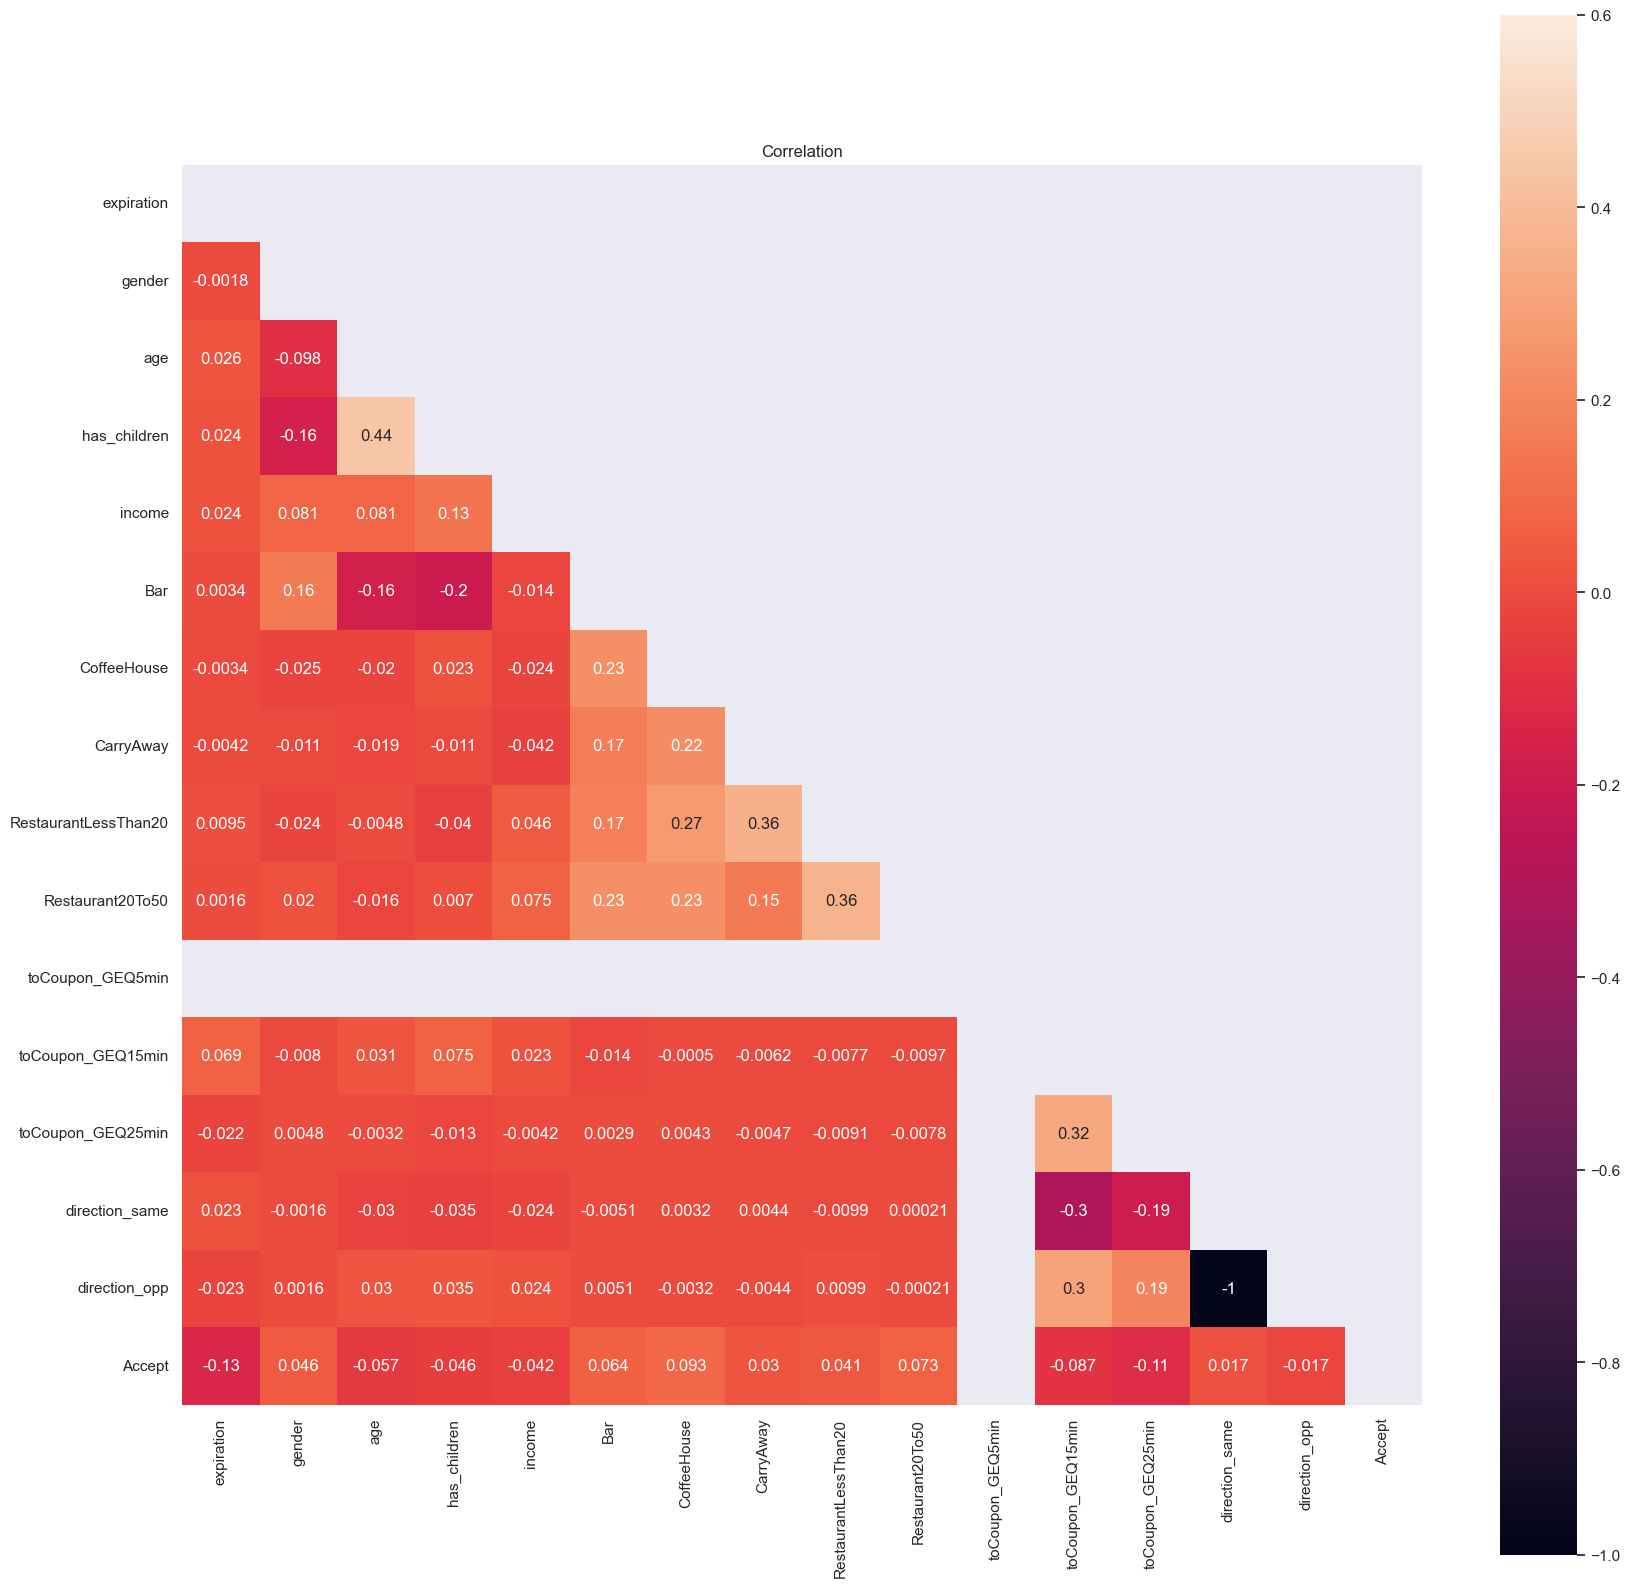

In [47]:
# Correlation
plt.figure(figsize = (20,20))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask, annot = True, vmax=.6, square=True)
plt.title('Correlation')
plt.show()

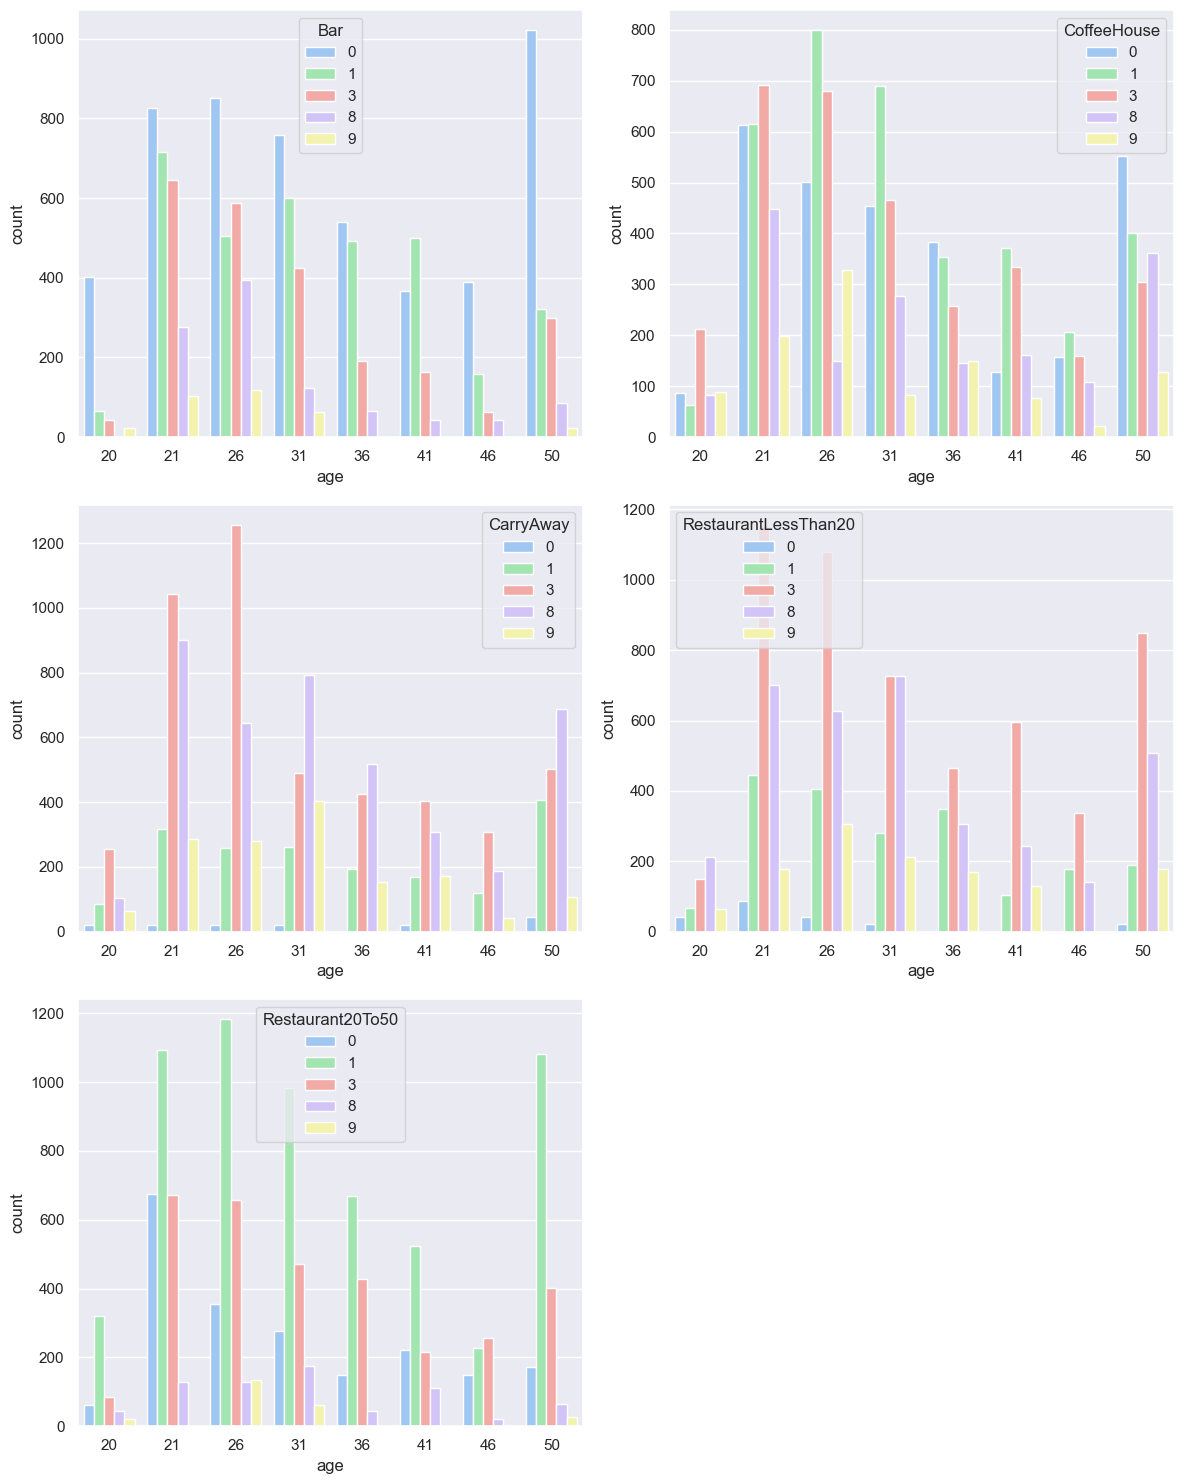

In [48]:
plt.figure(figsize = (12,15),constrained_layout = True )

a =1
for i in ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']:
    plt.subplot(3,2,a)
    sns.countplot(x ='age', hue = i, data = df)
    
    a=a+1
    
plt.tight_layout()
plt.show()

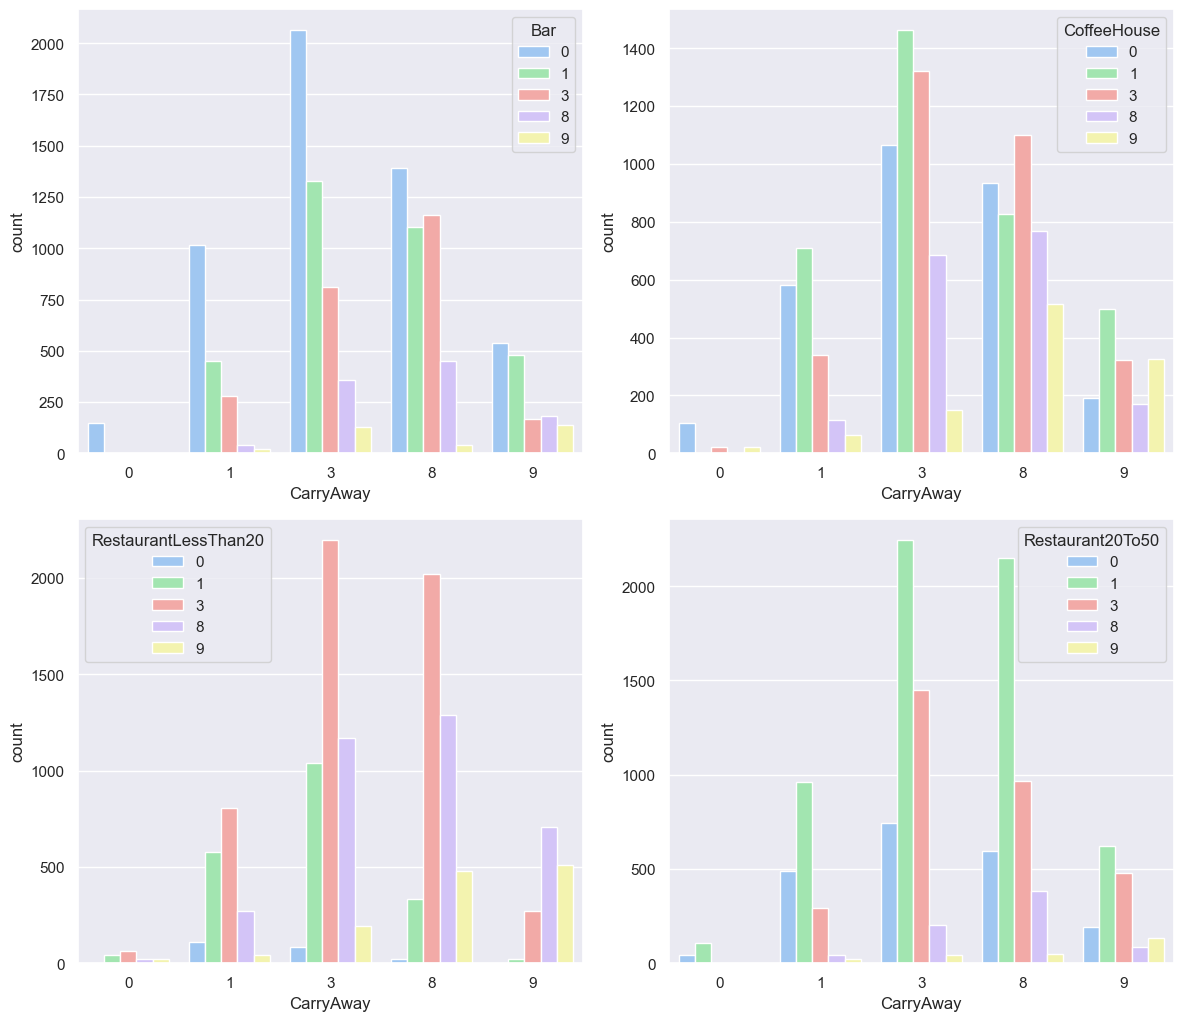

In [49]:
plt.figure(figsize = (12,15),constrained_layout = True )

a =1
for i in ['Bar','CoffeeHouse','RestaurantLessThan20','Restaurant20To50']:
    plt.subplot(3,2,a)
    sns.countplot('CarryAway', hue =i, data = df)
    
    a=a+1
    
plt.tight_layout()
plt.show()

In [50]:
df.columns

Index(['destination', 'passanger', 'weather', 'coupon', 'expiration', 'gender',
       'age', 'maritalStatus', 'has_children', 'occupation', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept'],
      dtype='object')

In [51]:
# Imbalance Data
df['Accept'].value_counts()

1    6954
0    5340
Name: Accept, dtype: int64

<br>

<br>

In [52]:
# Variables for Encoding
#encod = df.drop(columns = ['Accept'],axis =1)
encod = df.drop(columns = ['Accept', 'expiration','gender','has_children','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp' ], axis =1)

In [53]:
print(f'{encod.columns}\nlength-{len(encod.columns)}')

Index(['destination', 'passanger', 'weather', 'coupon', 'age', 'maritalStatus',
       'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50'],
      dtype='object')
length-13


In [54]:
# Encoding
df = pd.get_dummies(data = df, columns = encod.columns, drop_first = True )

In [55]:
df.columns

Index(['expiration', 'gender', 'has_children', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Accept', 'destination_No Urgent Place',
       'destination_Work', 'passanger_Friend', 'passanger_Kid',
       'passanger_Partner', 'weather_Snowy', 'weather_Sunny',
       'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant_btwn_twenty_fifty',
       'coupon_Restaurant_less_than_twenty', 'age_21', 'age_26', 'age_31',
       'age_36', 'age_41', 'age_46', 'age_50', 'maritalStatus_Married partner',
       'maritalStatus_Single', 'maritalStatus_Unmarried partner',
       'maritalStatus_Widowed', 'occupation_Retired', 'occupation_Student',
       'occupation_Unemployed', 'income_37499', 'income_62499', 'income_87499',
       'income_100000', 'income_112499', 'income_137499', 'income_162499',
       'income_187499', 'Bar_1', 'Bar_3', 'Bar_8', 'Bar_9', 'CoffeeHouse_1',
       'CoffeeHouse_3', 'CoffeeHouse_8

In [56]:
df.head()

,expiration,gender,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept,destination_No Urgent Place,...,CarryAway_8,CarryAway_9,RestaurantLessThan20_1,RestaurantLessThan20_3,RestaurantLessThan20_8,RestaurantLessThan20_9,Restaurant20To50_1,Restaurant20To50_3,Restaurant20To50_8,Restaurant20To50_9
0,0,0,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
1,1,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,1,0,0,1,1,1,...,0,0,0,0,1,0,0,1,0,0
3,1,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0


<br>

<br>

In [57]:
# Dpendent & Independent variable.
x = df.drop(columns = ['Accept'], axis =1)
y = df['Accept']

<br>

In [58]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_auc_score, roc_curve

In [59]:
# Train and Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 34)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9220, 61) (3074, 61) (9220,) (3074,)


In [60]:
def model(model):
    #Prediction
    y_predict_train = model.predict(x_train)
    y_predict_test = model.predict(x_test)
    
    # Accuracy
    print('*'*50,'Accuracy Score', '*'*50)
    print(f'Train Accuracy: {accuracy_score(y_train, y_predict_train)}\nTest Accuracy: {accuracy_score(y_test, y_predict_test )}\n')
    
    # Classification Report
    print('*'*50,'Classification Report', '*'*50)
    print(f'Classification Report for train data:\n\n{classification_report(y_train, y_predict_train)}\n')
    print(f'Classification Report for test data:\n\n{classification_report(y_test, y_predict_test)}')
    
    # Confusion matrix
    print('*'*50,'Confusion Matrix', '*'*50)
    print(f'Confusion Matrix for train data:\n{confusion_matrix(y_train, y_predict_train)}\n')
    print(f'Confusion Matrix for test data:\n{confusion_matrix(y_test, y_predict_test)}')
    
    plot_confusion_matrix(model, x_test, y_test, display_labels = ['Class 0', 'Class 1'])
    plt.title ('Confusion Matrix')
    plt.show()
    
    # ROC & AUc
    print('*'*50,'ROC & AUC', '*'*50)
    model_roc_auc_score = roc_auc_score(y_test, y_predict_test)
    print(f'The roc_auc_score for model is: {model_roc_auc_score}\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_test)
    print(f'fpr: {fpr}\ntpr: {tpr}\nthresholds: {thresholds}')
    
    # Plotting AUC & ROC curve
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = f"ROC curve (AUC = {model_roc_auc_score :.2f}%)", color = 'darkorange' )
    plt.plot([0,1],[0,1], ls = '--', color = 'navy')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    plt.show()

    # Cross Validation
    print('*'*50,'Cross Validation', '*'*50)
    
    train_cv = cross_val_score(model, x_train, y_train, cv = 10)
    test_cv = cross_val_score(model, x_test, y_test, cv =10)
    
    print(f'Avg.train_cv:{np.mean(train_cv)}\nAvg.test_cv:{np.mean(test_cv)}' )


def fetr_importance(model):
    pd.set_option('display.max_rows', 70)

    importance = model.feature_importances_ 
    xg_feature_importances = pd.DataFrame(data = importance, index = x.columns, columns = ['Importance'])
    return(xg_feature_importances.sort_values(by = 'Importance', ascending = False))

In [61]:
xg =  XGBClassifier(n_estimators = 800,
                    random_state = 345,
                    max_depth = 3,
                    reg_alpha = 0.1,
                    learning_rate = 0.1)
xg_model = xg.fit(x_train, y_train)

In [62]:
fetr_importance(xg_model)

,Importance
coupon_Restaurant_less_than_twenty,0.055625
coupon_Carry out & Take away,0.054411
expiration,0.039219
passanger_Friend,0.030889
weather_Sunny,0.030564
CoffeeHouse_3,0.028483
destination_No Urgent Place,0.026367
toCoupon_GEQ15min,0.024669
income_187499,0.023765
coupon_Coffee House,0.022639


************************************************** Accuracy Score **************************************************
Train Accuracy: 0.7843817787418655
Test Accuracy: 0.7257644762524398

************************************************** Classification Report **************************************************
Classification Report for train data:

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      4035
           1       0.79      0.84      0.81      5185

    accuracy                           0.78      9220
   macro avg       0.78      0.78      0.78      9220
weighted avg       0.78      0.78      0.78      9220


Classification Report for test data:

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1305
           1       0.76      0.77      0.76      1769

    accuracy                           0.73      3074
   macro avg       0.72      0.72      0.72      3074
weighted avg

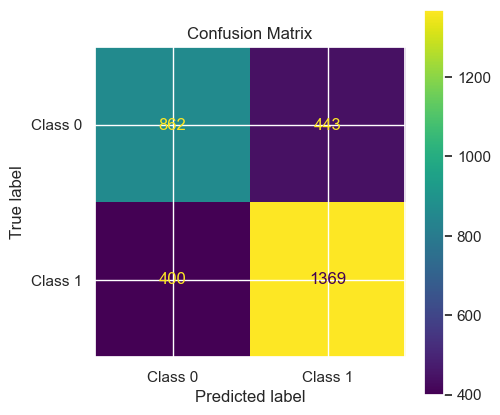

************************************************** ROC & AUC **************************************************
The roc_auc_score for model is: 0.7172099742478488

fpr: [0.        0.3394636 1.       ]
tpr: [0.         0.77388355 1.        ]
thresholds: [2 1 0]


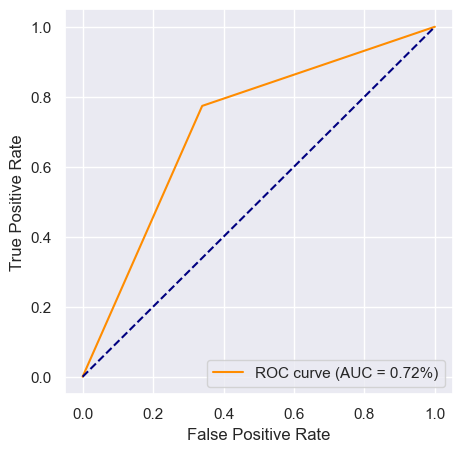

************************************************** Cross Validation **************************************************
Avg.train_cv:0.7302603036876356
Avg.test_cv:0.700410338846821


In [63]:
model(xg_model)

**Conclusion:**<br>
The XGBoost model, constructed for this dataset, underwent cross-validation with 10 folds to ensure robustness and reliability. Hyperparameter tuning was meticulously performed, optimizing parameters such as n_estimators, random_state, max_depth, reg_alpha, and learning_rate. As a result, the XGBoost model achieved a train accuracy of approximately 78% and a test accuracy of around 72% with cross-validation.<br>

1. **Weather Impact:** Sunny weather significantly increases the likelihood of users accepting coupons, particularly for the "Coffee House" offer.
2. **Coupon Expiration:** Coupons with shorter expiration times, such as 2 hours, are more likely to be accepted, especially for coffee house deals. For longer expiration periods, users tend to favor coffee house and bar coupons.
3. **Destination and Travel Companions:** Users are more inclined to accept coupons when their destination involves no urgent work. Additionally, when traveling to destinations like home or work, users are typically alone, while they travel with friends when the destination is "No Urgent Work."
4. **User Preferences:** Users tend to visit coupon platforms in the opposite direction of their destination, indicating a willingness to explore new venues.
5. **Establishment Visitation:** A significant portion of users does not visit bars at all, while coffee houses are popular destinations. Users frequently visit restaurants with lower average expenses per person, but they rarely visit establishments with higher average expenses.
6. **Travel Distance:** Users generally travel distances of more than 5 minutes to reach restaurants, cafes, or bars for coupon usage. For frequent visits, the travel time exceeds 15 minutes, while for rare visits, it surpasses 25 minutes.

